# Freq table between 2 features (categorical value)
Analyze diffent kinds of features

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\exploratory-data-analysis


### 0. Package and load data

In [2]:
from sklearn.datasets import fetch_california_housing
import json
import pandas as pd
import numpy as np
import seaborn as sns

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

#### load data categorical features and target generated by percentiles
This is generated in the notebook 0

In [3]:
data_percentile_feature_target = pd.read_pickle('data/df_cat_feature_target.pkl')
data_percentile_feature_target.head()

,quartile_MedInc,quartile_HouseAge,quartile_AveRooms,quartile_AveBedrms,quartile_Population,quartile_AveOccup,quartile_Latitude,quartile_Longitude,quartile_Price
0,q4 - (4.74-15.0),q4 - (37.0-52.0),q4 - (6.05-141.91),q2 - (1.01-1.05),q1 - (3.0-787.0),q2 - (2.43-2.82),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)
1,q4 - (4.74-15.0),q2 - (18.0-29.0),q4 - (6.05-141.91),q1 - (0.33-1.01),q4 - (1725.0-35682.0),q1 - (0.69-2.43),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)
2,q4 - (4.74-15.0),q4 - (37.0-52.0),q4 - (6.05-141.91),q3 - (1.05-1.1),q1 - (3.0-787.0),q2 - (2.43-2.82),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)
3,q4 - (4.74-15.0),q4 - (37.0-52.0),q3 - (5.23-6.05),q3 - (1.05-1.1),q1 - (3.0-787.0),q2 - (2.43-2.82),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)
4,q3 - (3.53-4.74),q4 - (37.0-52.0),q4 - (6.05-141.91),q3 - (1.05-1.1),q1 - (3.0-787.0),q1 - (0.69-2.43),q4 - (37.71-41.95),q1 - (-124.35--121.8),q4 - (2.65-5.0)


#### load data categorical only features generated by percentiles
This is generated in the notebook 0

In [4]:
data_percentile_feature = pd.read_pickle('data/df_cat_feature.pkl')
data_percentile_feature.head()

,Price,quartile_Latitude,quartile_Population,quartile_HouseAge,quartile_Longitude,quartile_AveOccup,quartile_AveRooms,quartile_MedInc,quartile_AveBedrms
0,4.526,q4 - (37.71-41.95),q1 - (3.0-787.0),q4 - (37.0-52.0),q1 - (-124.35--121.8),q2 - (2.43-2.82),q4 - (6.05-141.91),q4 - (4.74-15.0),q2 - (1.01-1.05)
1,3.585,q4 - (37.71-41.95),q4 - (1725.0-35682.0),q2 - (18.0-29.0),q1 - (-124.35--121.8),q1 - (0.69-2.43),q4 - (6.05-141.91),q4 - (4.74-15.0),q1 - (0.33-1.01)
2,3.521,q4 - (37.71-41.95),q1 - (3.0-787.0),q4 - (37.0-52.0),q1 - (-124.35--121.8),q2 - (2.43-2.82),q4 - (6.05-141.91),q4 - (4.74-15.0),q3 - (1.05-1.1)
3,3.413,q4 - (37.71-41.95),q1 - (3.0-787.0),q4 - (37.0-52.0),q1 - (-124.35--121.8),q2 - (2.43-2.82),q3 - (5.23-6.05),q4 - (4.74-15.0),q3 - (1.05-1.1)
4,3.422,q4 - (37.71-41.95),q1 - (3.0-787.0),q4 - (37.0-52.0),q1 - (-124.35--121.8),q1 - (0.69-2.43),q4 - (6.05-141.91),q3 - (3.53-4.74),q3 - (1.05-1.1)


#### Define data to use in the example, list features, target
In this notebooks only matters the features, so any of the two datasets can be used

In [5]:
### data to used
data = data_percentile_feature.copy()

### target
target = 'Price'

### list_features
list_features = list(set(data.columns.tolist()) - set([target]))

## cross table of frequency of the intersection between each feature

### 1. codes to eda

In [26]:
def list_map_features_features(df):
    """
    generate a list of tuples of each pair of features to generate a tuple(feature_x, feature_y) to generate a bivariate plot
    Args
        df (dataframe): dataframe with the features to plot
    Return
        list_pair_features: list with the tuples to plot
    """
    # create dataframe with each cell is a tuple formed by a pari (row,column)
    df_tuple_features = pd.DataFrame(columns = df.columns.tolist(), index = df.columns.tolist())
    for column in df_tuple_features.columns:
        for index in df_tuple_features.index:
            df_tuple_features.at[index, column] = (index, column)
    df_tuple_features = df_tuple_features.where(np.triu(np.ones(df_tuple_features.shape), k=1).astype('bool'))
    
    # get a list of tuple of each pair of features to do a scatter plot
    stacked_series = df_tuple_features.stack().dropna()
    list_pair_features = list(stacked_series)

    return list_pair_features

def plot_heatmap_crosstable_individual(df_ct, name_table):
    """
    Plot heatmap using the input dataframe

    Args
        df_corr (dataframe): dataframe with correlations to plot

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """
    
    # heatmap
    fig = px.imshow(df_ct, text_auto=True, aspect="auto")
    
    # change title
    fig.update_layout(
      title_text = name_table,
        title_x = 0.5,
    title_font = dict(size = 28)
      )
    
    return fig

In [7]:
# params
df = data
target = target

In [8]:
################# generate a list of tuples of each pair of features to generate the cross table  #####################
# delete target of the data
df_only_features = df.drop(columns = target)
# generate list of pair features
list_pair_features = list_map_features_features(df_only_features)

In [9]:
for index, (feature_x, feature_y) in enumerate(list_pair_features):
    print(index, feature_x, feature_y)

0 quartile_Latitude quartile_Population
1 quartile_Latitude quartile_HouseAge
2 quartile_Latitude quartile_Longitude
3 quartile_Latitude quartile_AveOccup
4 quartile_Latitude quartile_AveRooms
5 quartile_Latitude quartile_MedInc
6 quartile_Latitude quartile_AveBedrms
7 quartile_Population quartile_HouseAge
8 quartile_Population quartile_Longitude
9 quartile_Population quartile_AveOccup
10 quartile_Population quartile_AveRooms
11 quartile_Population quartile_MedInc
12 quartile_Population quartile_AveBedrms
13 quartile_HouseAge quartile_Longitude
14 quartile_HouseAge quartile_AveOccup
15 quartile_HouseAge quartile_AveRooms
16 quartile_HouseAge quartile_MedInc
17 quartile_HouseAge quartile_AveBedrms
18 quartile_Longitude quartile_AveOccup
19 quartile_Longitude quartile_AveRooms
20 quartile_Longitude quartile_MedInc
21 quartile_Longitude quartile_AveBedrms
22 quartile_AveOccup quartile_AveRooms
23 quartile_AveOccup quartile_MedInc
24 quartile_AveOccup quartile_AveBedrms
25 quartile_AveRoom

In [10]:
### generate cross table of frequency of the intersection between each feature
ct = pd.crosstab(df[feature_x], df[feature_y])
ct

quartile_AveBedrms,q1 - (0.33-1.01),q2 - (1.01-1.05),q3 - (1.05-1.1),q4 - (1.1-34.07)
quartile_MedInc,,,,
q1 - (0.5-2.56),892,1020,1329,1919
q2 - (2.56-3.53),1027,1190,1496,1447
q3 - (3.53-4.74),1397,1417,1277,1069
q4 - (4.74-15.0),1844,1543,1049,724


In [11]:
### generte cross table ofr frecuency normalizaed between each feature
ct = pd.crosstab(df[feature_x], df[feature_y], normalize=True)
ct

quartile_AveBedrms,q1 - (0.33-1.01),q2 - (1.01-1.05),q3 - (1.05-1.1),q4 - (1.1-34.07)
quartile_MedInc,,,,
q1 - (0.5-2.56),0.043217,0.049419,0.064390,0.092975
q2 - (2.56-3.53),0.049758,0.057655,0.072481,0.070107
q3 - (3.53-4.74),0.067684,0.068653,0.061870,0.051793
q4 - (4.74-15.0),0.089341,0.074758,0.050824,0.035078


In [21]:
### generte cross table ofr frecuency normalizaed between each feature and margins
ct_margins = pd.crosstab(df[feature_x], df[feature_y], normalize=True, margins = True)
ct_margins = ct_margins.round(3)
ct_margins

quartile_AveBedrms,q1 - (0.33-1.01),q2 - (1.01-1.05),q3 - (1.05-1.1),q4 - (1.1-34.07),All
quartile_MedInc,,,,,
q1 - (0.5-2.56),0.043,0.049,0.064,0.093,0.25
q2 - (2.56-3.53),0.050,0.058,0.072,0.070,0.25
q3 - (3.53-4.74),0.068,0.069,0.062,0.052,0.25
q4 - (4.74-15.0),0.089,0.075,0.051,0.035,0.25
All,0.250,0.250,0.250,0.250,1.00


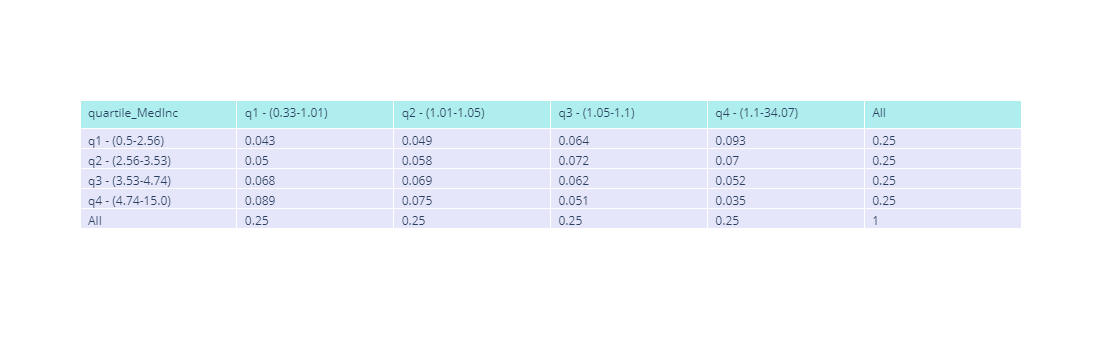

In [24]:
plot_df_table_plotly(ct_margins.reset_index())

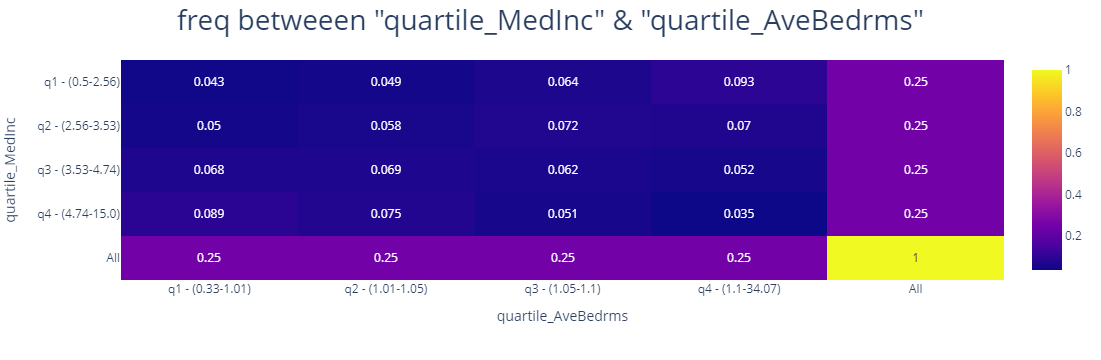

In [27]:
# plot heatmap
fig_ct_individual = plot_heatmap_crosstable_individual(ct_margins, f'freq betweeen "{feature_x}" & "{feature_y}"')
fig_ct_individual

<Axes: xlabel='quartile_MedInc'>

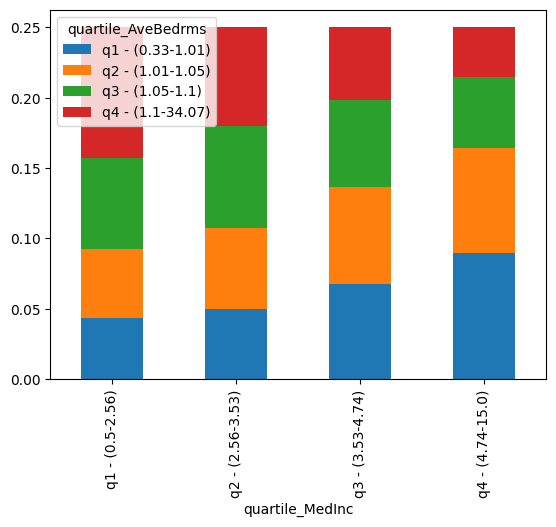

In [14]:
## plot barplot stack
ct.plot(kind='bar', stacked=True)

<Axes: xlabel='quartile_MedInc'>

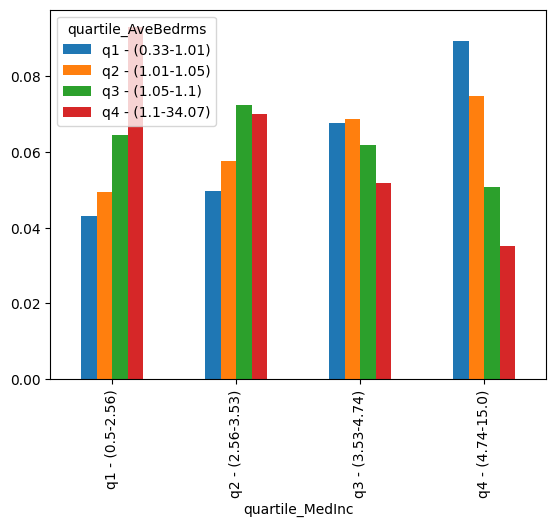

In [15]:
## plot barplot stack
ct.plot(kind='bar', stacked=False)

### 2. synthetize - given a dataframe generate a heatmap/histogram 2d of each feature

In [46]:
def heatmap_hist2d_features_percentile(df, target, ct_normalized = True, number_columns = 1):
    """
    Given a dataframe with columns features + target. Genereate a heatmap/histogram 2d between each pair of features categorical (ej percentile)
    Detail: given a dataframe with features categorical, generate a crosstab of freq between 2 features and plot it in a heatmap
    
    Args
        df (dataframe): input dataframe with columns features and target
        target (string): target of the dataframe, column that will be delete to plot the relations between only features
        ct_normalized (bool): boolean that indicate if the freq of each feature are normalized or not
        number_columns (integer): number of columns. because heatmap could be bigger, plot it into 1 columns by default

    Return
        fig (figure plotly): fig of plotly with the plot generated
    """

    ################# generate a list of tuples of each pair of features to generate the cross table  #####################
    df_only_features = df.drop(columns = target) # delete target of the data
    list_pair_features = list_map_features_features(df_only_features) # generate list of pair features

    
    ####################### plot #################################
    
    # calculate number of rows (considering the number of colums passed as args)
    if (len(list_pair_features) % number_columns) != 0:
        number_rows = (len(list_pair_features) // number_columns) + 1
    else:
        number_rows = (len(list_pair_features) // number_columns)

    # create fig to plot
    fig = make_subplots(rows=number_rows, cols=number_columns, 
                        subplot_titles = tuple([str(tupla) for tupla in list_pair_features]) ### title of each subplots
                       )

    ########## for each tuple of features to plot:
    for index_feature, (feature_x, feature_y) in enumerate(list_pair_features):

        # get indexes in the subplot (in plotly the indexes starts in 1)
        row = (index_feature // number_columns) + 1
        column = (index_feature % number_columns) + 1

        ## get cross table freq between feature_x and feature_y. with margins. It is possible to select between normalized values or not
        if ct_normalized:
            ct_freq_features = pd.crosstab(df[feature_x], df[feature_y], normalize=True, margins = True)
        else:
            ct_freq_features = pd.crosstab(df[feature_x], df[feature_y], normalize=False, margins = True)

        
        ## tranform cross table freq between pair of features into a heatmap
        fig_aux = px.imshow(ct_freq_features, text_auto=True, aspect="auto")
        
        
        # add scatter to fig global
        fig.add_trace(fig_aux.data[0],
            row = row,
            col = column
        )

    # adjust the shape
    fig.update_layout(
        height = 350 * number_rows,  # largo
        width = 850 * number_columns,  # ancho
        title_text =  f'[freq/cross table/hist 2d] betweeen pair of features',
        title_x=0.5,
        title_font = dict(size = 20)
    )

    return fig

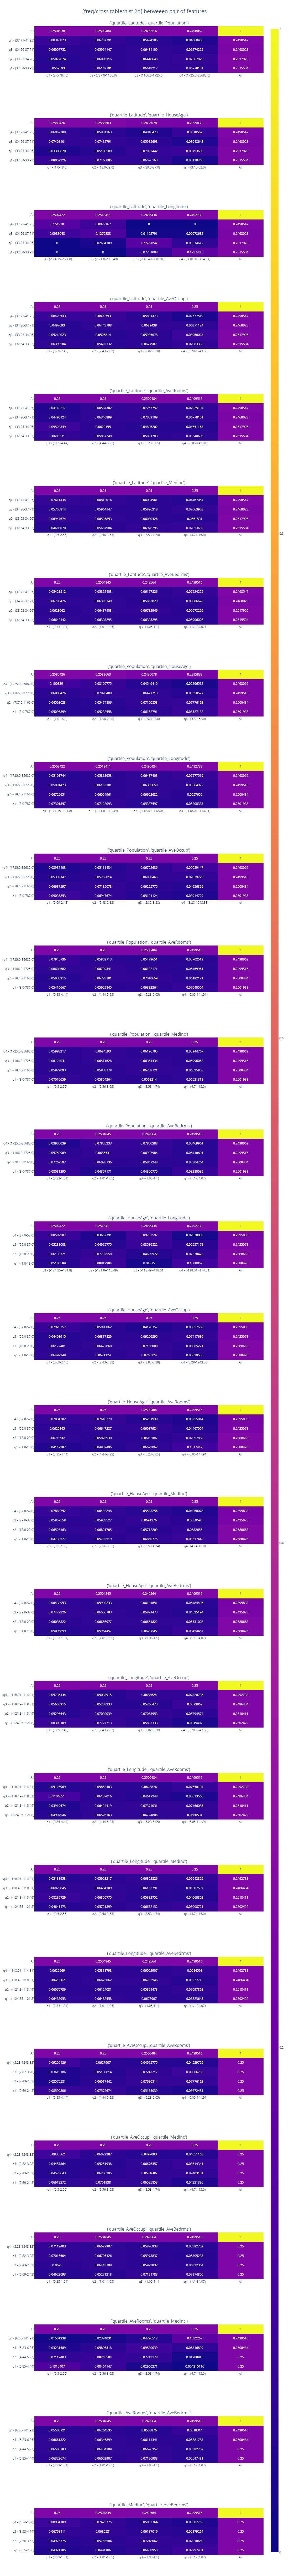

In [47]:
fig_freq_heatmap_all_features_percentile = heatmap_hist2d_features_percentile(df = data, 
                                                                              target = target, 
                                                                              ct_normalized = True)

fig_freq_heatmap_all_features_percentile.write_html("output_eda/5_categorical_analysis/freq_heatmap_all_features_percentile.html")

fig_freq_heatmap_all_features_percentile.show()